In [3]:
!pip install imagecodecs 

In [4]:
!pip install tifffile

In [2]:
# importanto as bibliotecas necessárias para o carregamento dos dados

import matplotlib.pyplot as plt
from PIL import Image,ImageOps, ImageFilter
import numpy as np
from sklearn.feature_extraction import image
from sklearn.feature_extraction.image import extract_patches_2d
import imagecodecs
import tifffile as tiff 
import skimage

# DATASET

## Carregando a imagem geotiff

In [3]:
img_dataset = tiff.imread('SONAR_CLIP.tif')

In [4]:
print(type(img_dataset))
print(img_dataset.shape)

<class 'numpy.ndarray'>
(5854, 4288, 3)


(<Figure size 988.8x604.8 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x15fe7679520>)

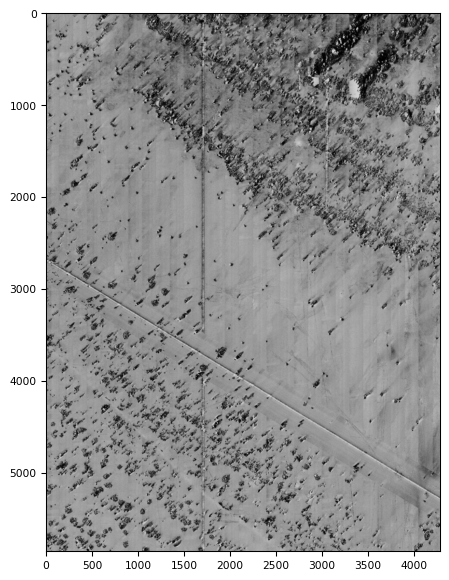

In [5]:
tiff.imshow(img_dataset)

In [6]:
# necessário cortar a imagem (array) pois com a imagem original não teve memória RAM suficiente para fazer os patches.

img_dataset_clip = img_dataset[4500:5000,2000:2500]

In [7]:
print(type(img_dataset_clip))
print(img_dataset_clip.shape)

<class 'numpy.ndarray'>
(500, 500, 3)


(<Figure size 988.8x604.8 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x15fe774bc10>)

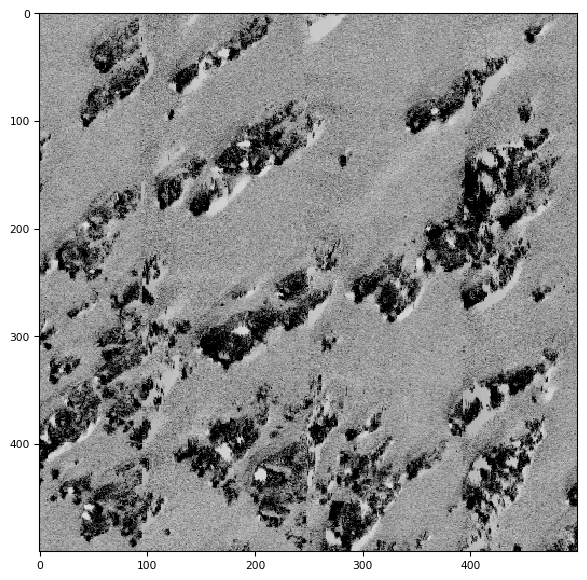

In [8]:
tiff.imshow(img_dataset_clip)

## Transformando a imagem geotiff (array) em patches

In [9]:
# utilizado patches de tamanho 100 x 100 pixels

patches_dataset = image.extract_patches_2d(img_dataset_clip,(100,100),max_patches=0.1,random_state=42)

In [10]:
# Quantidade de imagens do dataset

print(len(patches_dataset))

16080


In [11]:
# Quantidade de pixels de cada imagem

print(np.prod(patches_dataset.shape[1:]))

30000


In [12]:
print('patches_dataset shape: {}'.format(patches_dataset.shape))

patches_dataset shape: (16080, 100, 100, 3)


In [13]:
patches_dataset[100]

array([[[141, 141, 141],
        [149, 149, 149],
        [149, 149, 149],
        ...,
        [185, 185, 185],
        [197, 197, 197],
        [173, 173, 173]],

       [[157, 157, 157],
        [153, 153, 153],
        [129, 129, 129],
        ...,
        [185, 185, 185],
        [197, 197, 197],
        [197, 197, 197]],

       [[141, 141, 141],
        [165, 165, 165],
        [141, 141, 141],
        ...,
        [185, 185, 185],
        [181, 181, 181],
        [185, 185, 185]],

       ...,

       [[165, 165, 165],
        [173, 173, 173],
        [165, 165, 165],
        ...,
        [165, 165, 165],
        [133, 133, 133],
        [161, 161, 161]],

       [[157, 157, 157],
        [165, 165, 165],
        [165, 165, 165],
        ...,
        [157, 157, 157],
        [133, 133, 133],
        [153, 153, 153]],

       [[161, 161, 161],
        [153, 153, 153],
        [181, 181, 181],
        ...,
        [165, 165, 165],
        [117, 117, 117],
        [153, 153, 153]]

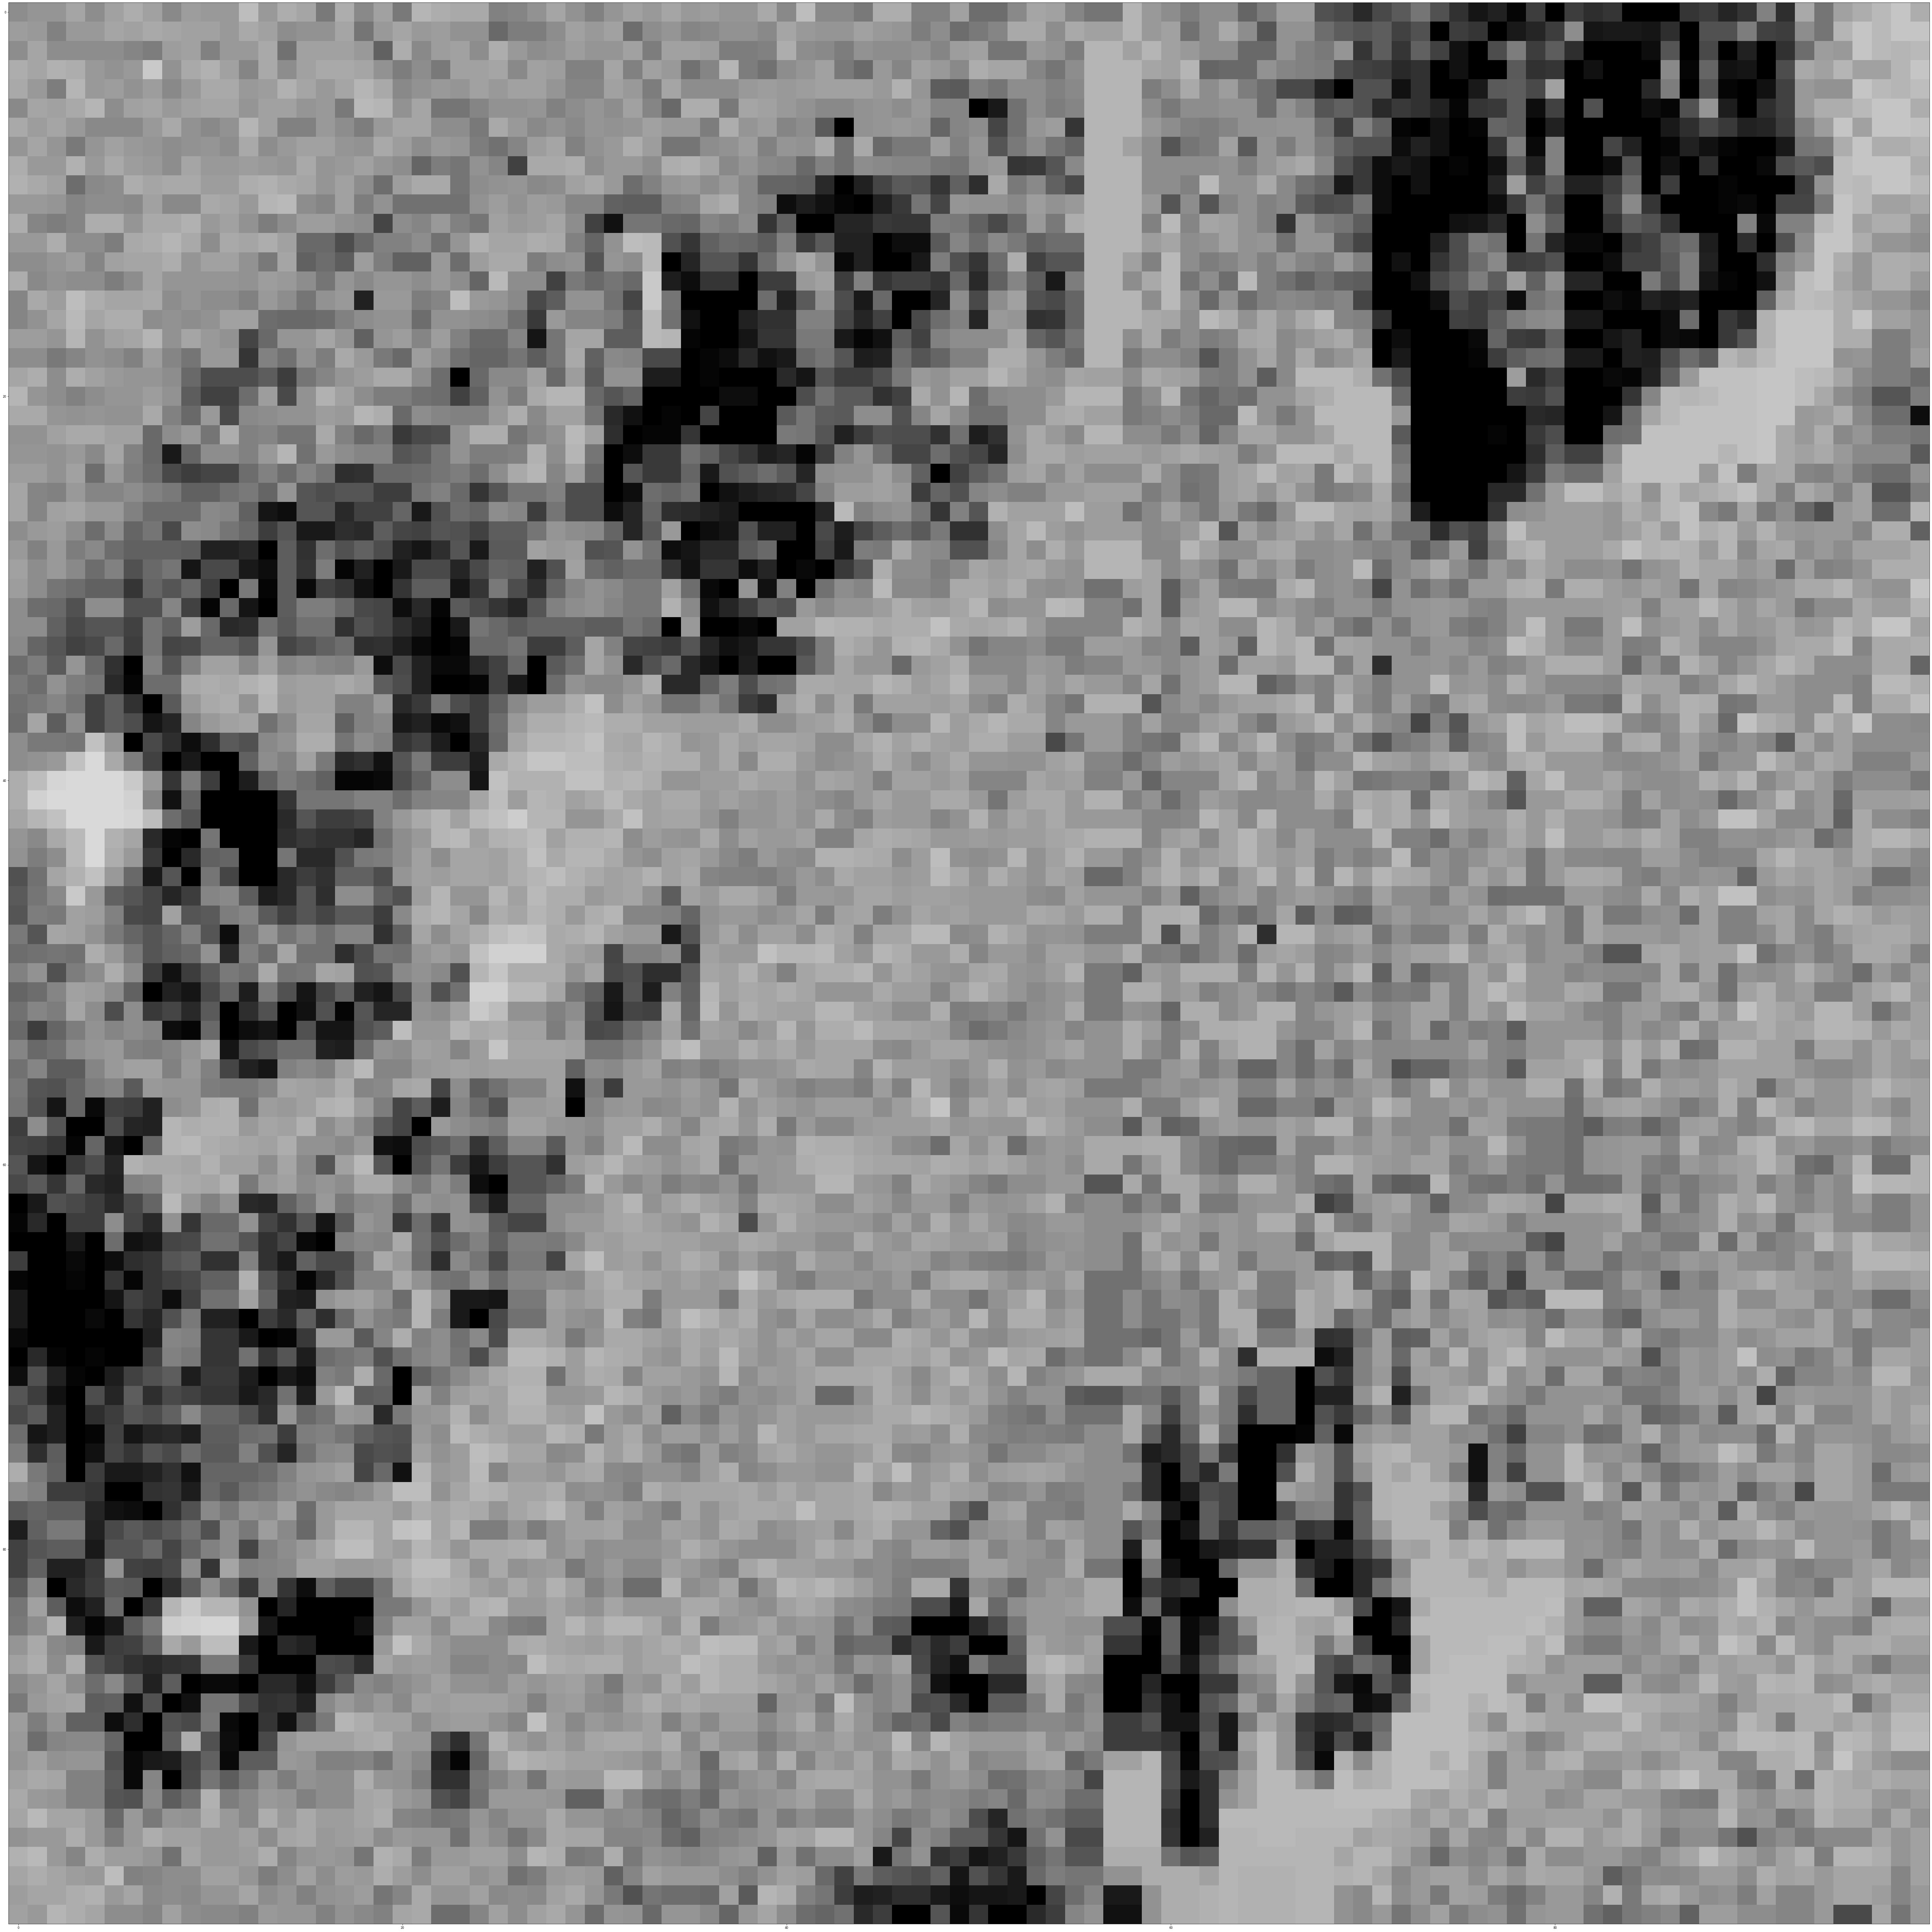

In [14]:
plt.figure(figsize=(100, 100))
plt.imshow(patches_dataset[100])
plt.show()

## Normalização, reshape e redução de dimensionalidade (PCA)

In [15]:
# Normalização

patches_dataset_normalizado = patches_dataset.astype('float32') / 255

In [16]:
patches_dataset_normalizado[100]

array([[[0.5529412 , 0.5529412 , 0.5529412 ],
        [0.58431375, 0.58431375, 0.58431375],
        [0.58431375, 0.58431375, 0.58431375],
        ...,
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.77254903, 0.77254903, 0.77254903],
        [0.6784314 , 0.6784314 , 0.6784314 ]],

       [[0.6156863 , 0.6156863 , 0.6156863 ],
        [0.6       , 0.6       , 0.6       ],
        [0.5058824 , 0.5058824 , 0.5058824 ],
        ...,
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.77254903, 0.77254903, 0.77254903],
        [0.77254903, 0.77254903, 0.77254903]],

       [[0.5529412 , 0.5529412 , 0.5529412 ],
        [0.64705884, 0.64705884, 0.64705884],
        [0.5529412 , 0.5529412 , 0.5529412 ],
        ...,
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.70980394, 0.70980394, 0.70980394],
        [0.7254902 , 0.7254902 , 0.7254902 ]],

       ...,

       [[0.64705884, 0.64705884, 0.64705884],
        [0.6784314 , 0.6784314 , 0.6784314 ],
        [0.64705884, 0

In [17]:
print('patches_dataset_normalizado shape: {}'.format(patches_dataset_normalizado.shape))

patches_dataset_normalizado shape: (16080, 100, 100, 3)


In [18]:
# Reshape

patches_dataset_normalizado_reshape = patches_dataset_normalizado.reshape(len(patches_dataset_normalizado), np.prod(patches_dataset_normalizado.shape[1:]))
print('Espaço de atributos (dimensões): {}'.format(patches_dataset_normalizado_reshape.shape))

Espaço de atributos (dimensões): (16080, 30000)


In [19]:
# PCA (redução de dimensionalidade)

from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(patches_dataset_normalizado_reshape)
patches_dataset_normalizado_reshape_pca = pca.transform(patches_dataset_normalizado_reshape)

In [20]:
print('shape patches_dataset_normalizado_reshape: {}'.format(patches_dataset_normalizado_reshape.shape))
print('shape patches_dataset_normalizado_reshape_pca: {}'.format(patches_dataset_normalizado_reshape_pca.shape))
print('redução de 30.000 para 100 dimensões')

shape patches_dataset_normalizado_reshape: (16080, 30000)
shape patches_dataset_normalizado_reshape_pca: (16080, 100)
redução de 30.000 para 100 dimensões


## Renomeando a variável para um nome menor

In [47]:
dataset = patches_dataset_normalizado_reshape_pca
dataset.shape

(16080, 100)

## Aumentando a dimensão do dataset

In [22]:
dataset= dataset.reshape(dataset.shape[0],dataset.shape[1],1,1)
dataset.shape


(16080, 100, 1, 1)

# LABELS

## 2 Labels: alvo refletivo com pixel = 0 e fundo lamoso com pixel= 243

### Carregando a imagem geotiff


In [23]:
img_label = tiff.imread('alvo_reflet_lama_rgb.tif')

In [24]:
print(type(img_label))
print(img_label.shape)

<class 'numpy.ndarray'>
(5854, 4288, 3)


(<Figure size 988.8x604.8 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x1602e604940>)

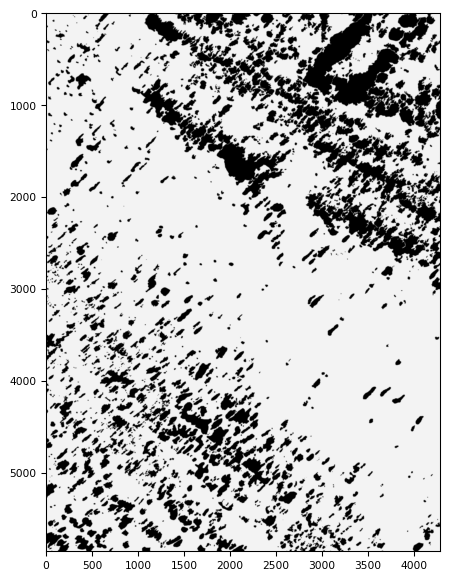

In [25]:
tiff.imshow(img_label)

In [26]:
# necessário cortar a imagem (array) do label para as mesmas dimensões da imagem do dataset.

img_label_clip = img_label[4500:5000,2000:2500]

In [27]:
print(type(img_label_clip))
print(img_label_clip.shape)

<class 'numpy.ndarray'>
(500, 500, 3)


(<Figure size 988.8x604.8 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x15ff3957190>)

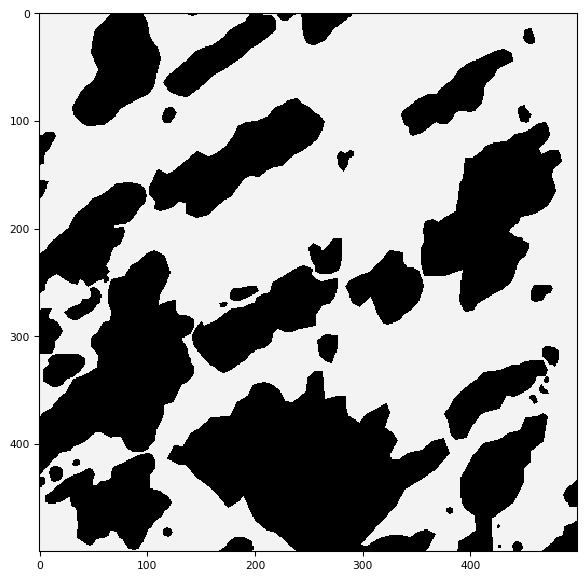

In [28]:
tiff.imshow(img_label_clip)

In [29]:
# 2 labels alvo refletivo com pixel=0 e fundo lamoso com pixel=243 

np.unique(img_label_clip)

array([  0, 243], dtype=uint8)

### Transformando a imagem geotiff (array) em patches

In [30]:
# utilizado patches de tamanho 100 x 100 pixels, iguais ao do dataset

patches_label = image.extract_patches_2d(img_label_clip,(100,100),max_patches=0.1,random_state=42)

In [31]:
# Quantidade de imagens do label

print(len(patches_label))

16080


In [32]:
# Quantidade de pixels de cada imagem

print(np.prod(patches_label.shape[1:]))

30000


In [33]:
print('patches_label shape: {}'.format(patches_label.shape))

patches_label shape: (16080, 100, 100, 3)


In [34]:
patches_label[100]

array([[[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]]

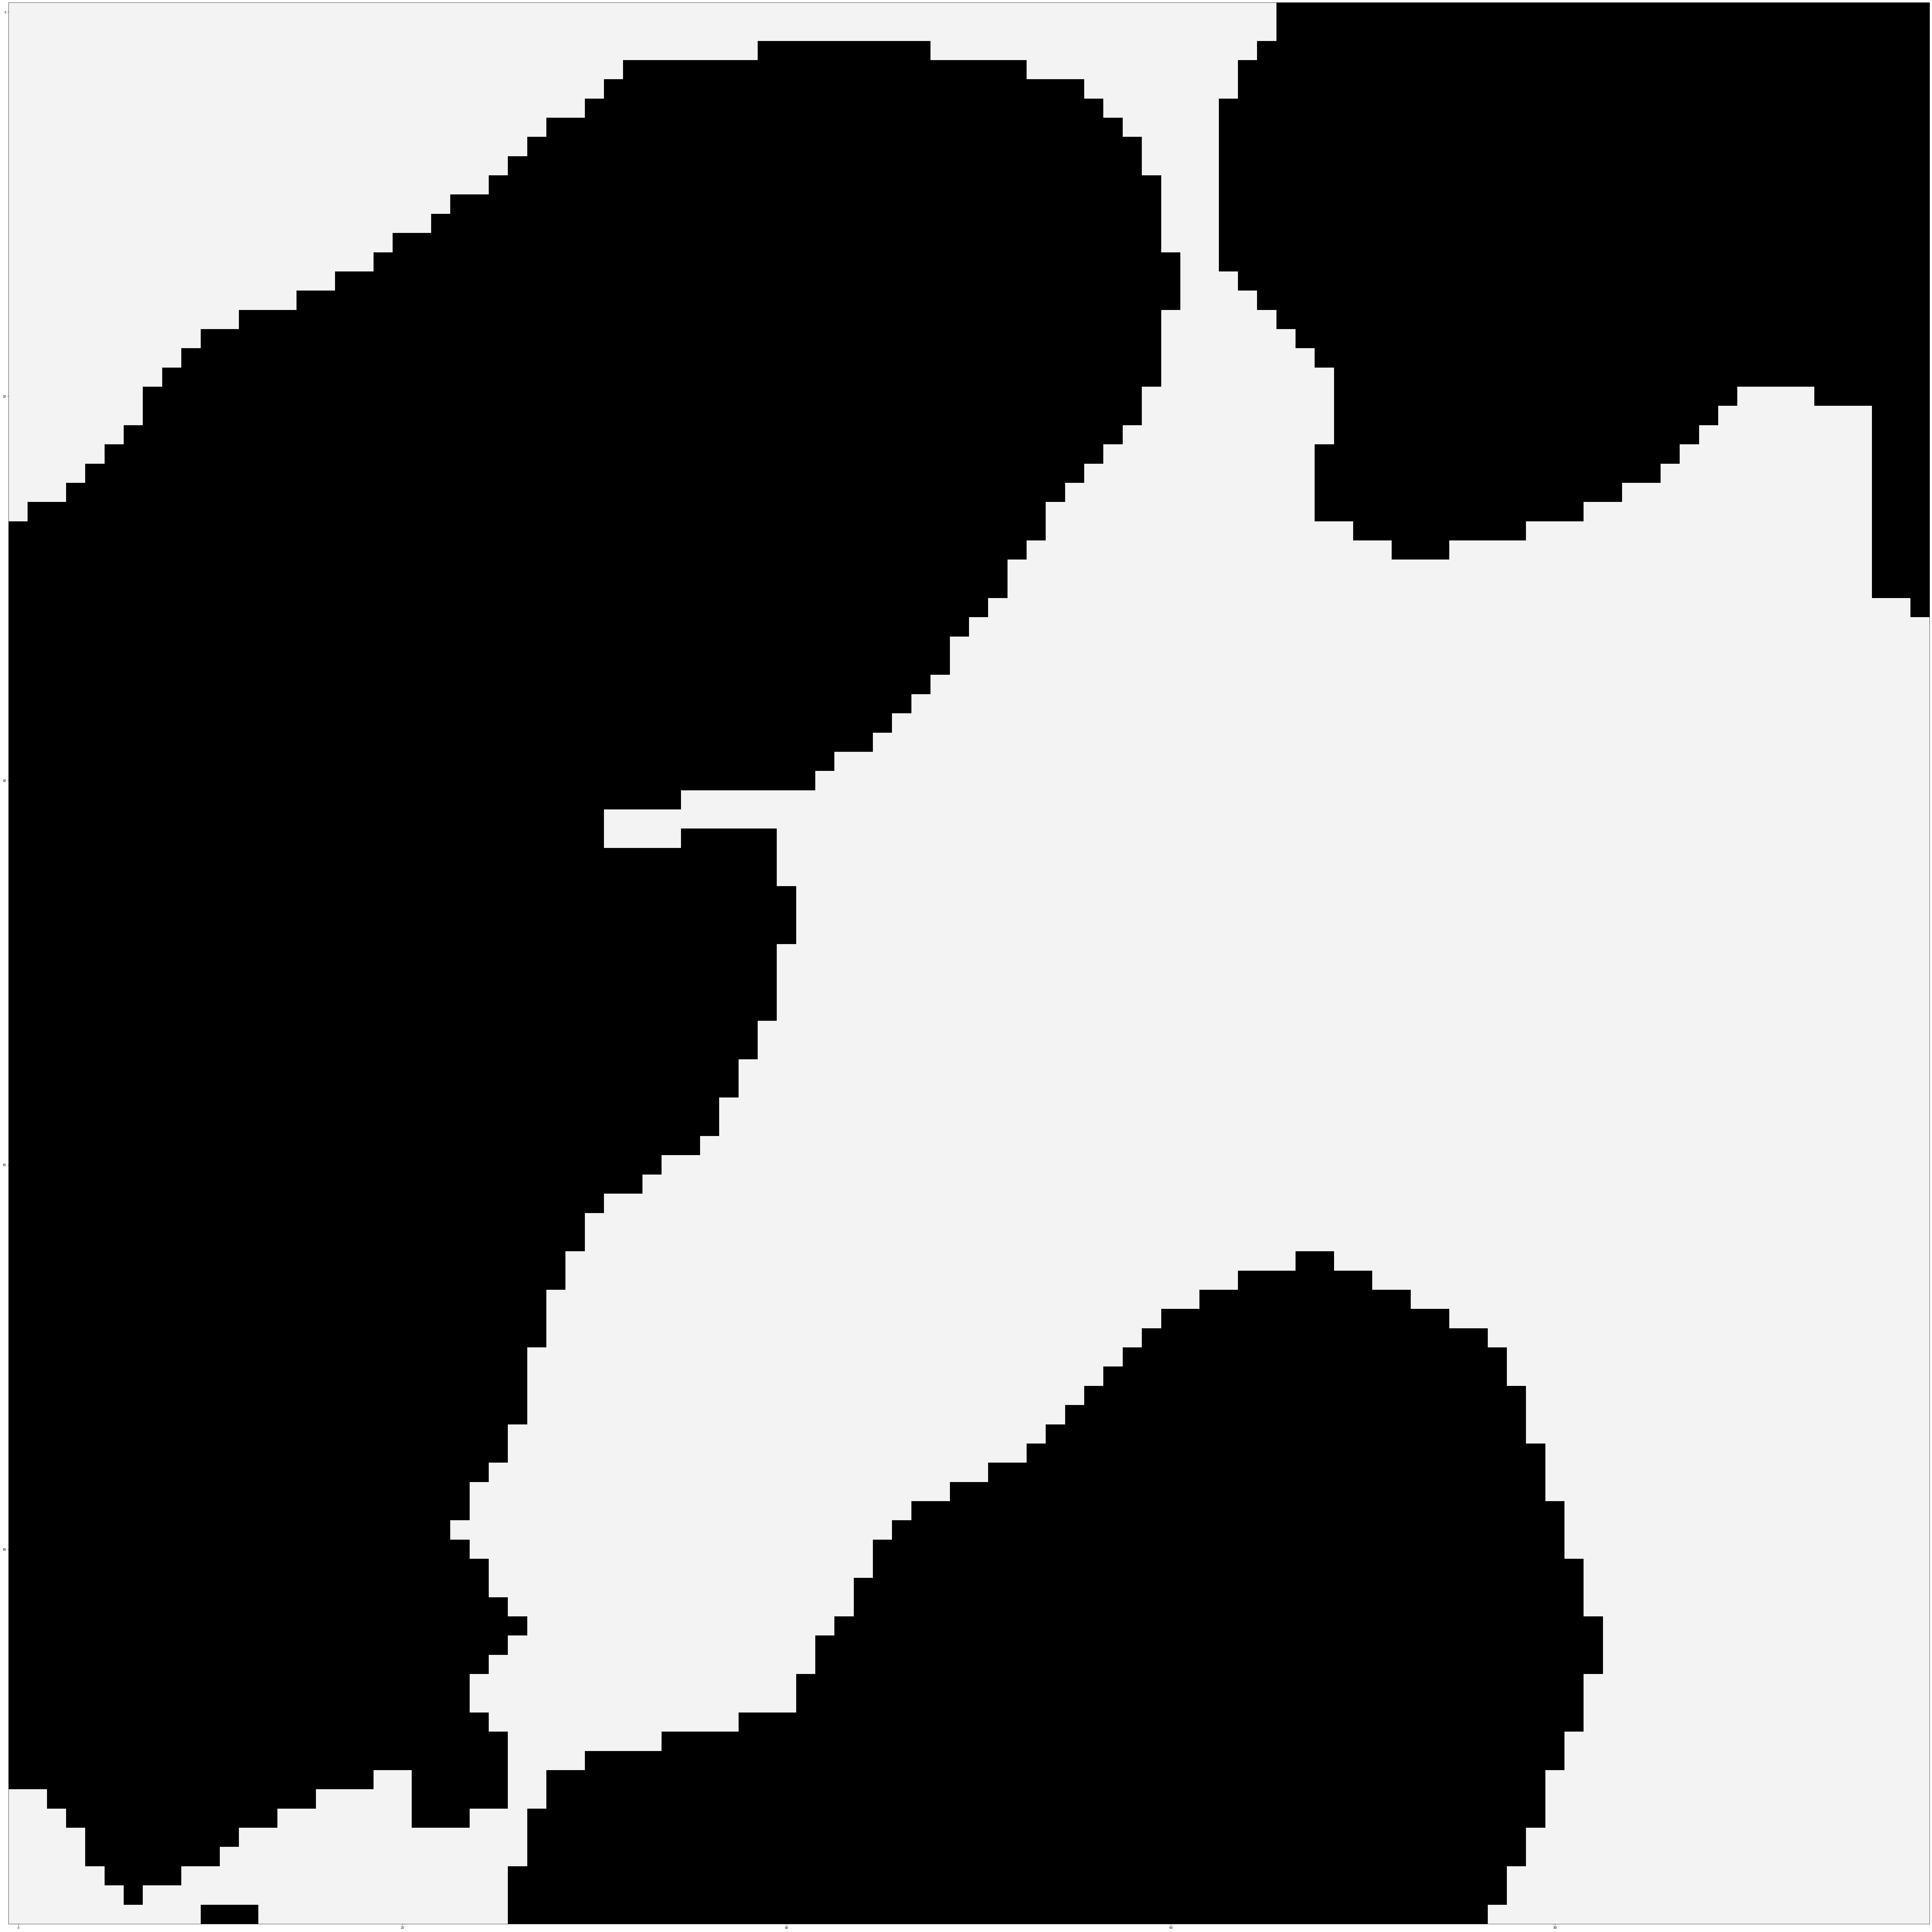

In [35]:
plt.figure(figsize=(100, 100))
plt.imshow(patches_label[100])
plt.show()

## Normalização, reshape e redução de dimensionalidade (PCA)

In [ ]:
# Normalização

patches_label_normalizado = patches_label.astype('float32') / 255

In [37]:
patches_label_normalizado[100]

array([[[0.9529412, 0.9529412, 0.9529412],
        [0.9529412, 0.9529412, 0.9529412],
        [0.9529412, 0.9529412, 0.9529412],
        ...,
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ]],

       [[0.9529412, 0.9529412, 0.9529412],
        [0.9529412, 0.9529412, 0.9529412],
        [0.9529412, 0.9529412, 0.9529412],
        ...,
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ]],

       [[0.9529412, 0.9529412, 0.9529412],
        [0.9529412, 0.9529412, 0.9529412],
        [0.9529412, 0.9529412, 0.9529412],
        ...,
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ]],

       ...,

       [[0.9529412, 0.9529412, 0.9529412],
        [0.9529412, 0.9529412, 0.9529412],
        [0.9529412, 0.9529412, 0.9529412],
        ...,
        [0.9529412, 0.9529

In [38]:
print('patches_label_normalizado shape: {}'.format(patches_label_normalizado.shape))

patches_label_normalizado shape: (16080, 100, 100, 3)


In [39]:
# Reshape

patches_label_normalizado_reshape = patches_label_normalizado.reshape(len(patches_label_normalizado), np.prod(patches_label_normalizado.shape[1:]))
print('Espaço de atributos (dimensões): {}'.format(patches_label_normalizado_reshape.shape))

Espaço de atributos (dimensões): (16080, 30000)


In [40]:
# PCA (redução de dimensionalidade)

from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(patches_label_normalizado_reshape)
patches_label_normalizado_reshape_pca = pca.transform(patches_label_normalizado_reshape)

In [41]:
print('shape patches_label_normalizado_reshape: {}'.format(patches_label_normalizado_reshape.shape))
print('shape patches_label_normalizado_reshape_pca: {}'.format(patches_label_normalizado_reshape_pca.shape))
print('redução de 30.000 para 100 dimensões')

shape patches_label_normalizado_reshape: (16080, 30000)
shape patches_label_normalizado_reshape_pca: (16080, 100)
redução de 30.000 para 100 dimensões


## Renomeando a variável do label

In [48]:
label = patches_label_normalizado_reshape_pca
label.shape

(16080, 100)

## Aumentando a dimensão do label

In [43]:
label = label.reshape(label.shape[0],label.shape[1],1,1)
label.shape

(16080, 100, 1, 1)

## Verificações do dataset e label

In [44]:
print('Shape da imagem original do dataset: {}'.format(img_dataset.shape))
print('Shape da imagem original do label: {}'.format(img_label.shape))

print('Shape dos patches do dataset: {}'.format(patches_dataset.shape))
print('Shape dos patches do label: {}'.format(patches_label.shape))


print('Quantidade de patches do dataset: {}'.format(len(patches_dataset)))
print('Quantidade de patches do label: {}'.format(len(patches_label)))


print('Quantidade de pixels de cada patch do dataset: {}'.format(np.prod(patches_dataset.shape[1:])))
print('Quantidade de pixels de cada patch do label: {}'.format(np.prod(patches_label.shape[1:])))


print('Shape final do dataset (após normalização, reshape, pca e reshape novamente): {}'.format(dataset.shape))
print('Shape final do label (após normalização, reshape, pca e reshape novamente): {}'.format(label.shape))

Shape da imagem original do dataset: (5854, 4288, 3)
Shape da imagem original do label: (5854, 4288, 3)
Shape dos patches do dataset: (16080, 100, 100, 3)
Shape dos patches do label: (16080, 100, 100, 3)
Quantidade de patches do dataset: 16080
Quantidade de patches do label: 16080
Quantidade de pixels de cada patch do dataset: 30000
Quantidade de pixels de cada patch do label: 30000
Shape final do dataset (após normalização, reshape, pca e reshape novamente): (16080, 100, 1, 1)
Shape final do label (após normalização, reshape, pca e reshape novamente): (16080, 100, 1, 1)


# CONSTRUINDO O MODELO CNN

In [45]:
# inicilaizando keras e sklearn

import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import UpSampling2D
from keras.layers import Cropping2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Considerando os dados dataset e label

In [57]:
print(patches_dataset_normalizado.shape)
print(patches_label_normalizado.shape)

(16080, 100, 100, 3)
(16080, 100, 100, 3)


In [58]:
# divisão do dataset e labels em dados de treinamento (70%) e dados de teste (30%).

x_train, x_test, y_train, y_test = train_test_split(patches_dataset_normalizado, patches_label_normalizado, test_size=0.30, random_state=42)

In [59]:
# Separar 3000 amostras para validação

x_val = x_train[-3000:]
y_val = y_train[-3000:]
x_train = x_train[:-3000]
y_train = y_train[:-3000]

In [60]:
# verificando o shape dos dados de treinamento, teste e validação

print('Shape do x_train : {}'.format(x_train.shape))
print('Shape do x_test : {}'.format(x_test.shape))
print('Shape do y_train : {}'.format(y_train.shape))
print('Shape do y_test : {}'.format(y_test.shape))
print('Shape do x_val : {}'.format(x_val.shape))
print('Shape do y_val : {}'.format(y_val.shape))

Shape do x_train : (8256, 100, 100, 3)
Shape do x_test : (4824, 100, 100, 3)
Shape do y_train : (8256, 100, 100, 3)
Shape do y_test : (4824, 100, 100, 3)
Shape do x_val : (3000, 100, 100, 3)
Shape do y_val : (3000, 100, 100, 3)


In [61]:
# categorizando os labels

from keras.utils import np_utils, generic_utils

y_train, y_test, y_val = [np_utils.to_categorical(x) for x in (y_train, y_test,y_val)]

# Modelo Wrapper

In [79]:
# Inicializar a CNN
classifier = Sequential()

# Passo 1 - Convolução
classifier.add(Conv2D(50, (3, 3), activation='relu', padding='same',input_shape=(100,100,3)))


# Passo 2 - Max Pooling
#classifier.add(MaxPooling2D((1, 1), padding='same'))


# Passo 3 - Convolução
#classifier.add(Conv2D(85, (3, 3), activation='relu', padding='same'))


# Passo 4 - Max Pooling
#classifier.add(MaxPooling2D((1, 1), padding='same'))


# Passo 5 - Convolução
#classifier.add(Conv2D(85, (3, 3), activation='relu', padding='same'))


# Passo 6 - Max Pooling
#classifier.add(MaxPooling2D((1,1), padding='same'))


# Passo 7 - Convolução
#classifier.add(Conv2D(85, (3, 3), activation='relu', padding='same'))


# Passo 8 - Upsampling
#classifier.add(UpSampling2D((2, 2)))


# Passo 9 - Convolução
#classifier.add(Conv2D(8, (3, 3), activation='relu', padding='same'))


# Passo 10 - Upsampling
#classifier.add(UpSampling2D((2, 2)))


# Passo 11 - Convolução
#classifier.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

# Passo 12 - Upsampling
#classifier.add(UpSampling2D((2, 2)))


# Passo 13 - Convolução
#classifier.add(Conv2D(3, (3, 3), activation='softmax', padding='same'))


# Compilar a CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


# Visualizar o modelo compilado
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 50)      1400      
Total params: 1,400
Trainable params: 1,400
Non-trainable params: 0
_________________________________________________________________


In [80]:
#Treinar

classifier.fit(x_train,y_train, validation_data = (x_val,y_val), epochs = 3, verbose=2)

Epoch 1/3


ValueError: in user code:

    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 100, 100, 3) and (32, 100, 100, 50) are incompatible


## Image segmentation with a U-Net-like architecture

In [67]:
#input_dir = "images/"
#target_dir = "annotations/trimaps/"
img_size = (100,100,3)
num_classes = 2
#batch_size = 32

In [69]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size)

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 50, 50, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 50, 50, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [70]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

# Train the model, doing validation at the end of each epoch.
epochs = 2
model.fit(x_train,y_train, epochs=epochs, validation_data=(x_val,y_val), callbacks=callbacks)

Epoch 1/2


ValueError: in user code:

    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\keras\backend.py:4782 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\ops\nn_ops.py:4174 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cicer\AppData\Local\Continuum\anaconda3\envs\Cicero_Junior\lib\site-packages\tensorflow\python\ops\nn_ops.py:4087 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (960000,)) should equal the shape of logits except for the last dimension (received (401408, 2)).


In [72]:
# Get the model.
inputs = keras.Input(shape=(100,100,3), name='sonar')
x = layers.Dense(3, activation='relu', name='dense_1')(inputs)
x = layers.Dense(3, activation='relu', name='dense_2')(x)
outputs = layers.Dense(2, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Instantiate an optimizer.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
batch_size = 12
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

epochs = 2
for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # Open a GradientTape to record the operations run
    # during the forward pass, which enables autodifferentiation.
    with tf.GradientTape() as tape:

      # Run the forward pass of the layer.
      # The operations that the layer applies
      # to its inputs are going to be recorded
      # on the GradientTape.
      logits = model(x_batch_train, training=True)  # Logits for this minibatch

      # Compute the loss value for this minibatch.
      loss_value = loss_fn(y_batch_train, logits)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss.
    grads = tape.gradient(loss_value, model.trainable_weights)

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    # Log every 200 batches.
    if step % 200 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

Start of epoch 0


ValueError: Shape mismatch: The shape of labels (received (360000,)) should equal the shape of logits except for the last dimension (received (120000, 2)).